# Linear Regression
### About the Notebook
This notebook contains a random dataset generator and linear regression demonstration.
- Jadon Lee

### Import Libraries

In [3]:
import random
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

### Generate Random Data (Optional)
The following code will generate a random data set that has a correlation around a given line. Replace "X Name" and "Y Name" with you x and y axis variables. Remember that your X variable is the *input* and your Y is the *output* that we are trying to predict.

,X Name,Y Name
0,6.756302,24.799766
1,23.666325,90.767612
2,12.078215,52.715693
3,5.007572,26.665737
4,10.043395,41.929362


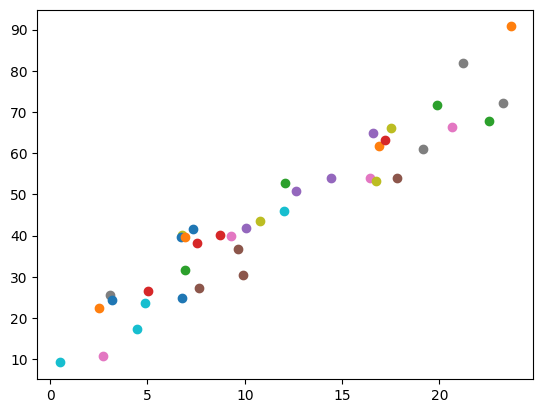

In [11]:
m = 3
b = 10
numPoints = 40
minX = 0
maxX = 24
yVariability = 10

X = []
Y = []
for i in range(numPoints):
      x = random.uniform(minX, maxX)
      X.append(x)
      y = x * m + b + random.uniform(-yVariability, yVariability)
      Y.append(y)
      plt.scatter(x, y)

coordinates = {
    'X Name': X,
    'Y Name': Y
}

coords = pd.DataFrame(coordinates)

coords.to_csv('./output.csv', index=False)

coords.head()

### Read Data From CSV

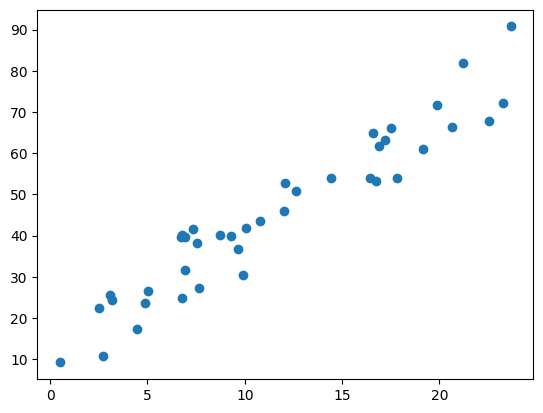

In [12]:
data = pd.read_csv('./output.csv') # change to ./output.csv if you want to use the random data generated from the last code block.
plt.scatter(data['X Name'], data['Y Name'])

### Define Sum Of Squared Residuals Cost Function


In [14]:
def error(s, b):
    sum = 0
    iteration = 0
    for x in data['X Name']:
        y = s * x + b
        sum += ((y - data.loc[iteration, 'Y Name']) ** 2)
        iteration += 1
    return sum

### Make a guess
If you want, you can make a guess by choosing a random line to represent your data. This is useful for seeing how sum of squared errors works.

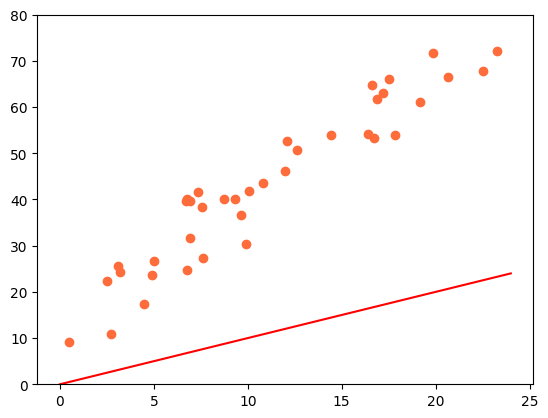

52260.869512729645


In [16]:
slope = 1
intercept = 0
plt.cla() # clear plot
plt.scatter(data['X Name'], data['Y Name'], c='#ff6c3b')
vx = np.linspace(0, 24) # set the domain of your line
vy = vx*slope + intercept # TIP: replace the multiplication * with a ** if you want to use exponents.
plt.gca().set_ylim([0, 80]) # set range limits
plt.plot(vx, vy, c='r') # the c value is just color. It can be changed to a custom hex value or color word (ex: green)
plt.show()
print(error(slope, intercept))

### Graph The Cost Function
While this is not a necessary step in gradient descent and linear regression, it is very helpful in visualizing our goal.
Note: I am only graphing a 2d cost function with the sloe on the x axis and cost on the y axis, ignoring the intercept in the graph. If you would like, though, you can adust the slope to see how it shifts the graph as a whole

In [19]:
def graph_cost(b, domain_max, domain_min):
    plt.cla()
    slope = domain_min
    while slope < domain_max:
        sum = 0
        iteration = 0
        for x in data['X Name']:
            y = slope * x + b
            sum += ((y - data.loc[iteration, 'Y Name']) ** 2)
            iteration += 1
        plt.scatter(slope, sum, color='red')
        slope += .1
    plt.show()

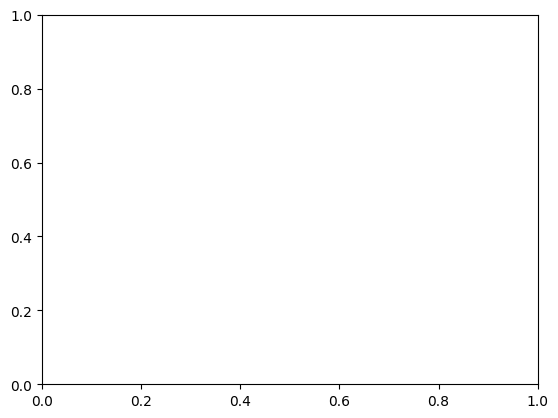

In [20]:
graph_cost(0, -2, 2)

### Perform a Least Squares Regression
Why a least squares regression? A least squares regression (in 2d graph at least) will result in the same result as a gradient descent.

In [21]:
x = np.array(data['X Name'])
y = np.array(data['Y Name'])
reg = LinearRegression().fit(x.reshape(-1, 1), y)
print(reg.coef_) # print slope
print(reg.intercept_) # print y-intercept

[2.82825539]
12.54422063822458


### Print Line On Scatter Plot

### Perform A Stochastic Gradient Descent Regression
The results should vary only slightly from standard regression, but should take less time to yield. With such a small data set and so few features, though, the benefits will be miniscule. As the amount of data scales up, using stochastic gradient descent becomes more and more beneficial.